# Box score data
   - Data containing statistical summaries of a sport event such as a game.
   <br>
   <br>
   - Most of these events and statistics are still generated by humans.
   <br>
   <br>
   - Dependent on the sport.

### Time-evolving championship tables and rankings
   - Consist of vertical lists of teams’ names and indicators of success such as **wins** and **losses**, **points earned for victories**.
   <br>
   <br>
   - **Types of Visualization:** 
       - Allowing to navigate in the time dimension of tables.
       - Showing relative gaps.
       
        <div style="text-align:center"><img width="450px" src="./images/spanish_liga.png"/></div>
        <br>
        <br>
        <div style="text-align:center">Figure 1: The second half of the 2013–2014 Spanish Liga, visualized using GapChart (Perin C., Boy J., Vernier F., 2016).</div>

### Scores, goals, and points
   - In many sports, teams or players participating in a game or competition need to score points to win each game.
   <br>
   <br>
   **Types of Visuaization:**
       - Contextualizing by overplotting.
       - Visualizing all statistics.
       - Laying out in context.
       - Showing relative differences rather than absolute values.
       <br>
       <br>
       
       <div style="text-align:center"><img width="700px" src="./images/shots_on_goal.png"/></div>
       <div style="text-align:center">Figure 2: Small multiples of football games putting the shots and goals in the context of soccer game timelines (Love C., 2015) (cropped).</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NBA Enhanced Box Score and Standings (2012 - 2018)

## Load data

Dataset: https://www.kaggle.com/pablote/nba-enhanced-stats

Source: https://www.kaggle.com/dster/nba-which-quarters-correlate-most-with-winning

In [2]:
df = pd.read_csv('../datasets/nba-enhanced-stats/2017-18_teamBoxScore.csv')

In [3]:
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
2,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,...,86.2033,118.0353,119.0108,-0.9755,0.4725,24.2442,2.0000,29.4118,102.5117,102.9406
3,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,...,81.9038,119.0108,118.0353,0.9755,0.4700,19.1309,2.1538,69.2308,102.5117,102.0863
4,2017-10-18,07:00,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,...,70.7113,103.0506,90.9270,12.1236,0.4271,17.8731,2.6667,155.5556,98.9805,99.8123


In [4]:
columns = ["teamAbbr", "teamLoc", "teamPTS", "teamPTS1", "teamPTS2", "teamPTS3", "teamPTS4", "teamPTS5", 
         "opptAbbr", "opptLoc", "opptPTS", "opptPTS1", "opptPTS2", "opptPTS3", "opptPTS4", "opptPTS5"]
df = df[columns]

# Each pair of rows is equivalent, but reversing the first and second teams.
# Remove each second row to avoid this "duplicated" (mirrored) data.
df = df.iloc[::2, :].reset_index(drop = True)

In [5]:
df.head()

,teamAbbr,teamLoc,teamPTS,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,opptAbbr,opptLoc,opptPTS,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5
0,BOS,Away,99,19,19,33,28,0,CLE,Home,102,29,25,18,30,0
1,HOU,Away,122,34,28,26,34,0,GS,Home,121,35,36,30,20,0
2,CHA,Away,90,27,18,25,20,0,DET,Home,102,29,27,26,20,0
3,BKN,Away,131,30,33,35,33,0,IND,Home,140,29,36,41,34,0
4,MIA,Away,109,37,18,23,31,0,ORL,Home,116,32,26,30,28,0


## Which quarter correlates more with winning?

In [6]:
for i in range(1, 6):
    df["ptsDiff%s" % i] = df["teamPTS%s" % i] - df["opptPTS%s" % i]
    
df["teamWin"] = (df["teamPTS"] > df["opptPTS"]).apply(lambda x: x and 1.0 or -1.0)
df["wentToOT"] = (df["teamPTS5"] + df["opptPTS5"]) > 0

In [7]:
df.head()

,teamAbbr,teamLoc,teamPTS,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,opptAbbr,opptLoc,...,opptPTS3,opptPTS4,opptPTS5,ptsDiff1,ptsDiff2,ptsDiff3,ptsDiff4,ptsDiff5,teamWin,wentToOT
0,BOS,Away,99,19,19,33,28,0,CLE,Home,...,18,30,0,-10,-6,15,-2,0,-1.0,False
1,HOU,Away,122,34,28,26,34,0,GS,Home,...,30,20,0,-1,-8,-4,14,0,1.0,False
2,CHA,Away,90,27,18,25,20,0,DET,Home,...,26,20,0,-2,-9,-1,0,0,-1.0,False
3,BKN,Away,131,30,33,35,33,0,IND,Home,...,41,34,0,1,-3,-6,-1,0,-1.0,False
4,MIA,Away,109,37,18,23,31,0,ORL,Home,...,30,28,0,5,-8,-7,3,0,-1.0,False


### Check the correlations for games that finished in regular time.

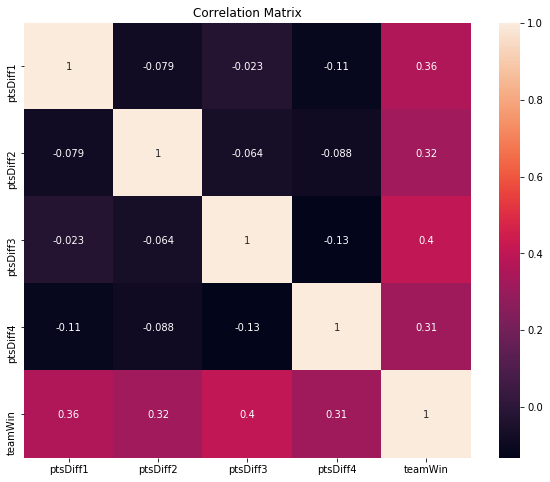

In [8]:
df_corr = df[df['wentToOT'] == False]
df_corr = df_corr[["ptsDiff1", "ptsDiff2", "ptsDiff3", "ptsDiff4", "teamWin"]]
corr = df_corr.corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values). \
                set_title('Correlation Matrix')

### Check the correlations for games that ended up going to overtime.

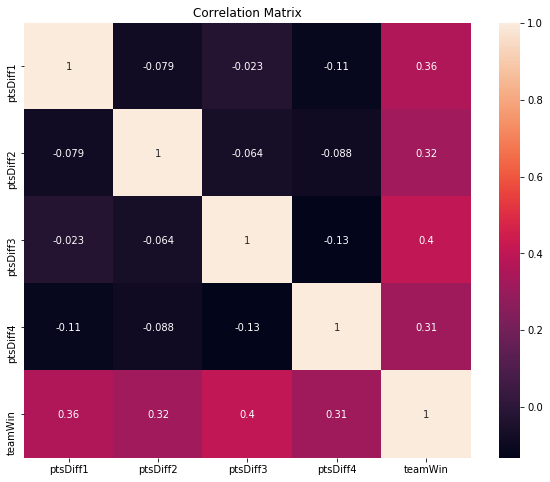

In [9]:
df_corr_ot = df[df['wentToOT'] == True]
df_corr_ot = df_corr_ot[["ptsDiff1", "ptsDiff2", "ptsDiff3", "ptsDiff4", "ptsDiff5", "teamWin"]]
corr_ot = df_corr_ot.corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values). \
                set_title('Correlation Matrix')

Done!